## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u> 

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [1]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/CSE\ 519\ fall\ 2021/HW2

[Errno 2] No such file or directory: 'drive/MyDrive/CSE 519 fall 2021/HW2'
/content


In [2]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse 
files.upload()

In [ ]:
!kaggle competitions download -c microsoft-malware-prediction

 99% 663M/672M [00:11<00:00, 75.6MB/s]
100% 672M/672M [00:11<00:00, 63.5MB/s]
 98% 752M/768M [00:04<00:00, 183MB/s]
100% 768M/768M [00:04<00:00, 166MB/s]
 90% 121M/134M [00:02<00:00, 45.4MB/s]
100% 134M/134M [00:02<00:00, 61.9MB/s]


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Section 1: Library and Data Imports (Q1)**

- Import your libraries and read the data into a dataframe. Print the head of the dataframe. 

In [30]:
import pandas as pd 
import numpy as np


use_cols = ["MachineIdentifier", "SmartScreen", "AVProductsInstalled", "AppVersion", "CountryIdentifier", "Census_OSInstallTypeName", "Wdft_IsGamer",
           "EngineVersion", "AVProductStatesIdentifier", "Census_OSVersion", "Census_TotalPhysicalRAM", "Census_ActivationChannel",
           "RtpStateBitfield", "Census_ProcessorModelIdentifier", "Census_PrimaryDiskTotalCapacity", 
            "Census_InternalPrimaryDiagonalDisplaySizeInInches", "Wdft_RegionIdentifier", "LocaleEnglishNameIdentifier",
           "AvSigVersion", "IeVerIdentifier", "IsProtected", "Census_InternalPrimaryDisplayResolutionVertical", "Census_PrimaryDiskTypeName",
            "Census_OSWUAutoUpdateOptionsName", "Census_OSEdition", "Census_GenuineStateName", "Census_ProcessorCoreCount", 
           "Census_OEMNameIdentifier", "Census_MDC2FormFactor", "Census_FirmwareManufacturerIdentifier", "OsBuildLab", "Census_OSBuildRevision", 
            "Census_OSBuildNumber", "Census_IsPenCapable", "Census_IsTouchEnabled", "Census_IsAlwaysOnAlwaysConnectedCapable", "Census_IsSecureBootEnabled", 
            "Census_SystemVolumeTotalCapacity", "Census_PrimaryDiskTotalCapacity", "HasDetections"
           ]


dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16'        
  }






In [31]:
orig_df = pd.read_csv("drive/MyDrive/DSF/HW2/train.csv", sep= ',', dtype = dtypes, usecols = use_cols)


In [32]:
processed_dataframe = orig_df.copy(deep=True)

#df1 = pd.read_csv("drive/MyDrive/DSF/HW2/train.csv", sep= ',', dtype = dtypes, usecols = use_cols_different)

processed_dataframe.dropna(how='all')

processed_dataframe.head()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,LocaleEnglishNameIdentifier,OsBuildLab,IsProtected,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionVertical,Census_OSVersion,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,53447.0,1.0,29,-85,17134.1.amd64fre.rs4_release.180410-1804,1.0,137.0,NaN,Desktop,2668.0,4.0,2340.0,476940.0,HDD,299451.0,4096.0,18.906250,900.0,10.0.17134.165,17134,165,Professional,UUPUpgrade,UNKNOWN,IS_GENUINE,Retail,628.0,0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,53447.0,1.0,93,64,17134.1.amd64fre.rs4_release.180410-1804,1.0,137.0,NaN,Notebook,2668.0,4.0,2404.0,476940.0,HDD,102385.0,4096.0,13.898438,768.0,10.0.17134.1,17134,1,Professional,IBSClean,UNKNOWN,OFFLINE,Retail,628.0,0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,53447.0,1.0,86,49,17134.1.amd64fre.rs4_release.180410-1804,1.0,137.0,RequireAdmin,Desktop,4908.0,4.0,1972.0,114473.0,SSD,113907.0,4096.0,21.500000,1080.0,10.0.17134.165,17134,165,Core,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,142.0,0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,53447.0,1.0,88,115,17134.1.amd64fre.rs4_release.180410-1804,1.0,137.0,ExistsNotSet,Desktop,1443.0,4.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,18.500000,768.0,10.0.17134.228,17134,228,Professional,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,355.0,0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,53447.0,1.0,18,75,17134.1.amd64fre.rs4_release.180410-1804,1.0,137.0,RequireAdmin,Notebook,1443.0,4.0,2500.0,476940.0,HDD,101900.0,6144.0,14.000000,768.0,10.0.17134.191,17134,191,Core,Update,FullAuto,IS_GENUINE,Retail,355.0,0,0,0,0.0,0.0,1.0,1


In [6]:
processed_dataframe.Census_OSArchitecture.unique()

['amd64', 'arm64', 'x86']
Categories (3, object): ['amd64', 'arm64', 'x86']

In [18]:
processed_dataframe.Census_OSArchitecture.value_counts()

amd64    8105885
x86       815252
arm64        346
Name: Census_OSArchitecture, dtype: int64

In [19]:
processed_dataframe.Census_PrimaryDiskTypeName.unique()

['HDD', 'SSD', 'UNKNOWN', 'Unspecified', NaN]
Categories (4, object): ['HDD', 'SSD', 'UNKNOWN', 'Unspecified']

In [8]:
processed_dataframe.head()

,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,Firewall,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_TotalPhysicalRAM,Census_OSBuildNumber,Census_OSBuildRevision,Census_IsVirtualDevice,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Census_PrimaryDiskTypeName_HDD,Census_PrimaryDiskTypeName_SSD,Census_PrimaryDiskTypeName_UNKNOWN,Census_PrimaryDiskTypeName_Unspecified,Census_OSArchitecture_amd64,Census_OSArchitecture_arm64,Census_OSArchitecture_x86
0,53447.0,1.0,1.0,1,29,1.0,4.0,476940.0,4096.0,17134,165,0.0,0,0.0,10.0,0,1,0,0,0,1,0,0
1,53447.0,1.0,1.0,1,93,1.0,4.0,476940.0,4096.0,17134,1,0.0,0,0.0,8.0,0,1,0,0,0,1,0,0
2,53447.0,1.0,1.0,1,86,1.0,4.0,114473.0,4096.0,17134,165,0.0,0,0.0,3.0,0,0,1,0,0,1,0,0
3,53447.0,1.0,1.0,1,88,1.0,4.0,238475.0,4096.0,17134,228,0.0,0,0.0,3.0,1,0,0,1,0,1,0,0
4,53447.0,1.0,1.0,1,18,1.0,4.0,476940.0,6144.0,17134,191,0.0,0,0.0,1.0,1,1,0,0,0,1,0,0


In [25]:
#Null Analysis
null_percentage = (processed_dataframe.isnull().sum() / processed_dataframe.shape[0])/100

print(type(null_percentage))

new_df= pd.DataFrame(data=null_percentage,columns=['%nullvalues'])

new_df = new_df.sort_values(by='%nullvalues',ascending=False)

print(new_df)

<class 'pandas.core.series.Series'>
                                        %nullvalues
AVProductStatesIdentifier                       0.0
Census_IsTouchEnabled                           0.0
Census_OSArchitecture_arm64                     0.0
Census_OSArchitecture_amd64                     0.0
Census_PrimaryDiskTypeName_Unspecified          0.0
Census_PrimaryDiskTypeName_UNKNOWN              0.0
Census_PrimaryDiskTypeName_SSD                  0.0
Census_PrimaryDiskTypeName_HDD                  0.0
HasDetections                                   0.0
Wdft_RegionIdentifier                           0.0
Wdft_IsGamer                                    0.0
Census_IsVirtualDevice                          0.0
AVProductsInstalled                             0.0
Census_OSBuildRevision                          0.0
Census_OSBuildNumber                            0.0
Census_TotalPhysicalRAM                         0.0
Census_PrimaryDiskTotalCapacity                 0.0
Census_ProcessorCoreCount   

In [9]:
processed_dataframe.Census_IsVirtualDevice.value_counts()

0.0    8842840
1.0      62690
Name: Census_IsVirtualDevice, dtype: int64

In [10]:
processed_dataframe.Census_IsTouchEnabled.value_counts()

0    7801452
1    1120031
Name: Census_IsTouchEnabled, dtype: int64

4
41306
                        MachineIdentifier  ... HasDetections
0        0000028988387b115f69f31a3bf04f09  ...             0
1        000007535c3f730efa9ea0b7ef1bd645  ...             0
2        000007905a28d863f6d0d597892cd692  ...             0
3        00000b11598a75ea8ba1beea8459149f  ...             1
4        000014a5f00daa18e76b81417eeb99fc  ...             1
...                                   ...  ...           ...
8921478  ffffedfe8fcc46e6d36ab39953589fee  ...             1
8921479  ffffef606490b2970873ec0a27ebd24b  ...             0
8921480  fffff8a40070d2d8379bb7fa2ed2fa66  ...             1
8921481  fffffbbaaf5969ae4b93e7f3f6d7132f  ...             1
8921482  ffffff75ba4f33d938ccfdb148b8ea16  ...             0

[8880177 rows x 39 columns]
4


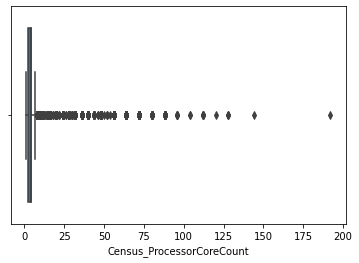

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=processed_dataframe.Census_ProcessorCoreCount)


In [9]:
print(processed_dataframe.Census_OSBuildNumber.unique())

[17134 14393 16299 10586 10240 15063 17744 17692 17738 17751 17713 17755
 17741 17733 17746 17735 17754 17758 17740 17672 17763 17666 17677 17686
 17747 14314 17760 17133 17759 17682 17761 17661 17643 18234 18242 17639
 17634 14986 18237 17704 16275 17650 15031 14390 17723 14257 14295 16179
 14385 17711 15042 17004  7601 17728 14342 15002 18240 14316 17627 14366
 14946 14352 17730 14905 15019 16251 14372  9600 17655 15055 17017 14291
  9200 18219 14971 17742 16232 15025 18204 14379 17063 17035 14389 14361
 10565 14931 15048 16294 11099 14936 18214 17074 17623 14271 14926 17025
 16176 17604 16241 17618 17128 14901 16278 16199 14915 17127 14332 10576
 16193 11082 14298 18224 18241 17689 17753 16281 17093 16288 14230 16215
 14955 16257 17046 14421 14328 18227 18238 14425 14965 14959 15061 17107
 16170 17694 14306 14300 17757 18233  7600 14474 16296 15060 14206 16273
 16291 14951 14279 17756 14942 17040 17749 14267 17752 18064 17115 18226
 15046 14383 16237 18230 18244 17083 18236 14466 17

In [13]:
processed_dataframe.Census_OSEdition.unique()

['Professional', 'Core', 'CoreSingleLanguage', 'EnterpriseS', 'CoreCountrySpecific', ..., 'ServerDatacenterACor', 'Pro', 'Enterprise 2015 LTSB', 'Home', 'professional']
Length: 33
Categories (33, object): ['Professional', 'Core', 'CoreSingleLanguage', 'EnterpriseS', ..., 'Pro',
                          'Enterprise 2015 LTSB', 'Home', 'professional']

## **Section 2: Measure of Power (Q2a & 2b)**

['HDD', 'SSD', 'UNKNOWN', 'Unspecified', NaN]
Categories (4, object): ['HDD', 'SSD', 'UNKNOWN', 'Unspecified']
12844


,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,LocaleEnglishNameIdentifier,OsBuildLab,IsProtected,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionVertical,Census_OSVersion,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
578,000449c24d3da56ce053b5c87f51166d,1.1.15200.1,4.10.209.0,1.275.348.0,7.0,53447.0,1.0,141,75,9600.19101.amd64fre.winblue_ltsb_escrow.180718...,1.0,333.0,RequireAdmin,Notebook,4728.0,2.0,652.0,476940.0,NaN,476838.0,4096.0,15.500000,768.0,10.0.10586.104,10586,104,Core,Update,FullAuto,OFFLINE,Retail,556.0,0,0,0,0.0,0.0,10.0,1
1229,00091e67e6d72de4b2916637e7cd7319,1.1.15200.1,4.10.209.0,1.275.1104.0,7.0,50188.0,2.0,201,-5,9600.19101.amd64fre.winblue_ltsb_escrow.180718...,1.0,333.0,RequireAdmin,Notebook,4728.0,4.0,2574.0,953869.0,NaN,940181.0,8192.0,15.601562,768.0,10.0.10586.218,10586,218,CoreSingleLanguage,Update,FullAuto,IS_GENUINE,Retail,513.0,1,0,0,0.0,0.0,11.0,1
2423,0011a8af30f0c7c7a94d313eeed6b470,1.1.15200.1,4.10.209.0,1.275.1603.0,7.0,53447.0,1.0,150,-94,9600.19125.amd64fre.winblue_ltsb.180812-0703,1.0,333.0,RequireAdmin,Notebook,2206.0,4.0,187.0,953869.0,NaN,936735.0,8192.0,NaN,NaN,10.0.10586.0,10586,0,Core,Refresh,FullAuto,IS_GENUINE,Retail,554.0,1,0,0,0.0,0.0,15.0,0
3123,0016ceedb42ff88d8e7390a6942fb4d4,1.1.15100.1,4.10.209.0,1.273.1504.0,7.0,46567.0,2.0,60,-23,9600.19035.amd64fre.winblue_ltsb_escrow.180522...,1.0,333.0,RequireAdmin,Notebook,2206.0,4.0,2320.0,953869.0,NaN,928163.0,4096.0,NaN,NaN,10.0.10586.63,10586,63,Core,Upgrade,FullAuto,IS_GENUINE,Retail,554.0,1,0,0,0.0,0.0,15.0,0
3232,0017bf33159daa2af7aa3056376f58e9,1.1.15200.1,4.10.209.0,1.275.1349.0,7.0,29199.0,1.0,66,88,7601.24214.amd64fre.win7sp1_ldr_escrow.180801-...,1.0,335.0,NaN,Notebook,525.0,8.0,2874.0,715404.0,NaN,259449.0,6144.0,17.296875,900.0,10.0.10586.164,10586,164,Core,Update,FullAuto,IS_GENUINE,Retail,142.0,0,1,0,0.0,0.0,5.0,0


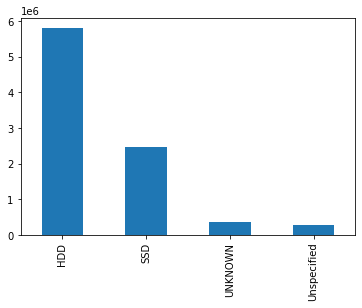

In [45]:
print(processed_dataframe.Census_PrimaryDiskTypeName.unique())

processed_dataframe.Census_PrimaryDiskTypeName.value_counts().plot(kind='bar')

print(processed_dataframe.Census_PrimaryDiskTypeName.isna().sum())

df_where_primary_disk_isna = processed_dataframe[processed_dataframe.Census_PrimaryDiskTypeName.isna()]

df_where_primary_disk_isna.head()


In [46]:
processed_dataframe.Census_TotalPhysicalRAM.value_counts()

4096.0     4094512
8192.0     2196505
2048.0     1097474
16384.0     531558
6144.0      398671
            ...   
6231.0           1
6228.0           1
6225.0           1
6222.0           1
255.0            1
Name: Census_TotalPhysicalRAM, Length: 3446, dtype: int64

In [47]:
processed_dataframe.Census_ProcessorCoreCount.fillna(value=processed_dataframe['Census_ProcessorCoreCount'].mean(), inplace=True)

In [48]:
#Scaling down the RAM values by taking logs

import math

processed_dataframe.Census_TotalPhysicalRAM.fillna(value=processed_dataframe['Census_TotalPhysicalRAM'].mean(), inplace=True)

print(processed_dataframe.Census_TotalPhysicalRAM.value_counts(ascending=True))


def scaled_ram(ram):
  try: 
    return math.log(ram)
  except:
    print(ram)


processed_dataframe['Census_TotalPhysicalRAM'] = pd.Series(map(scaled_ram, processed_dataframe.Census_TotalPhysicalRAM))

255.0            1
6225.0           1
6228.0           1
6231.0           1
6240.0           1
            ...   
6144.0      398671
16384.0     531558
2048.0     1097474
8192.0     2196505
4096.0     4094512
Name: Census_TotalPhysicalRAM, Length: 3447, dtype: int64


In [49]:
#Providing Suitable weights to disk names

processed_dataframe.Census_PrimaryDiskTypeName.fillna('Unspecified', inplace=True)

def get_disk_weight(disk_type):
  if disk_type in 'SSD':
    return 15
  return 1

processed_dataframe['Census_PrimaryDiskTypeName'] = pd.Series(map(get_disk_weight, processed_dataframe.Census_PrimaryDiskTypeName))


In [50]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

def min_max_scalar(dataframe: pd.DataFrame):

  from sklearn.preprocessing import MinMaxScaler
  
  min_max_scalar = MinMaxScaler()
  cols = ['Census_ProcessorCoreCount' ,'Census_TotalPhysicalRAM', 'Census_PrimaryDiskTypeName']
  dataframe[cols] = min_max_scalar.fit_transform(dataframe[cols])
  
  return dataframe

def get_power(processor_count, ram, disk_type):
  try:
    return ram + disk_type + processor_count
  except:
    print(ram)

processed_dataframe = min_max_scalar(processed_dataframe)

processed_dataframe['power'] = pd.Series(
    map(get_power,
     processed_dataframe.Census_ProcessorCoreCount,
     processed_dataframe.Census_TotalPhysicalRAM,
     processed_dataframe.Census_PrimaryDiskTypeName
  ))

processed_dataframe.power.describe()


count    8.880177e+06
mean     6.359759e-01
std      4.684913e-01
min      0.000000e+00
25%      3.338524e-01
50%      3.803126e-01
75%      1.254428e+00
max      2.581152e+00
Name: power, dtype: float64

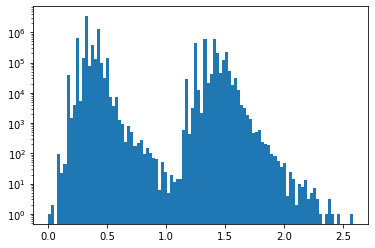

In [51]:
plt.hist(processed_dataframe.power, bins=100, log=True);

Distribution of power across the dataset is not normal and is skewed towards the minimum and maximum extremes. With multiple peaks it the data exibits skewness across the graph as seen.

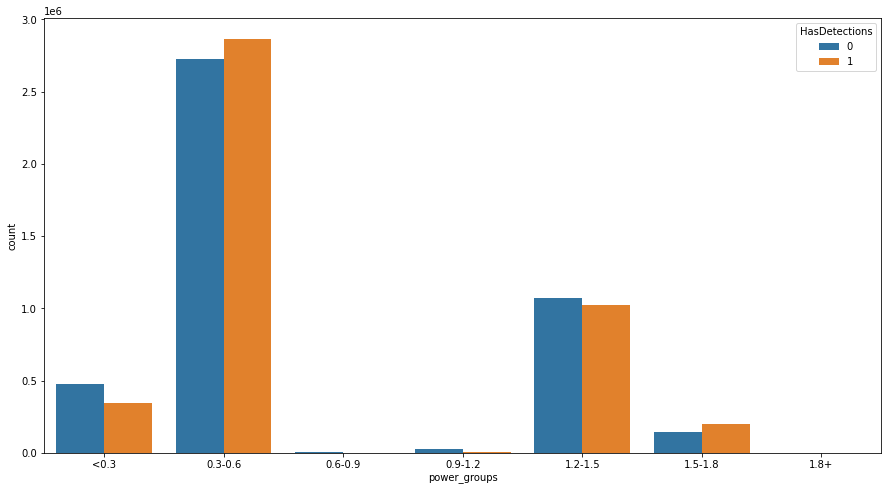

0.3-0.6    5589107
1.2-1.5    2094431
<0.3        820803
1.5-1.8     341424
0.9-1.2      28678
0.6-0.9       4654
1.8+          1022
Name: power_groups, dtype: int64

In [54]:
bins = [0,0.3,0.6,0.9,1.2,1.5,1.8,2.1] #,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,np.inf]
names = ['<0.3','0.3-0.6', '0.6-0.9', '0.9-1.2', '1.2-1.5','1.5-1.8','1.8+']
processed_dataframe['power_groups'] = pd.cut(processed_dataframe['power'], bins, labels=names)

plt.figure(figsize=(15,8))
sns.countplot(x ="power_groups", hue="HasDetections", data=processed_dataframe)

plt.show()

processed_dataframe.power_groups.value_counts()

As per seen by the above graph , which is power vs the malware detection , we can see that it really doesnt depend on the power of the omputer on its capablity to detect malwares on not. The machines having large power also has equal number of malwares detected vs not detected.

HEATMAP:


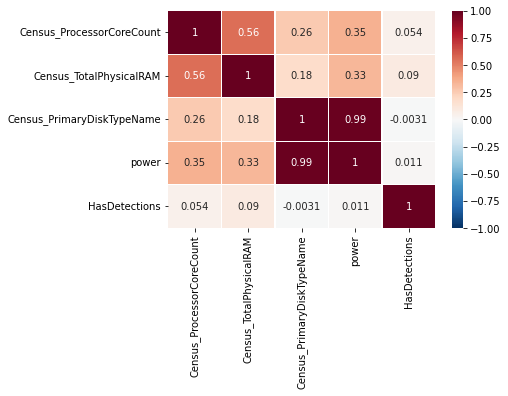

In [55]:
correlation_matrix = processed_dataframe[['Census_ProcessorCoreCount' ,'Census_TotalPhysicalRAM', 'Census_PrimaryDiskTypeName','power','HasDetections']].corr()
print("HEATMAP:")
sns.heatmap(correlation_matrix,vmin=-1, vmax=1, cmap='RdBu_r', linewidths=0.2, annot=True)
plt.show()

## **Section 3: OS version vs Malware detected (Q3)**

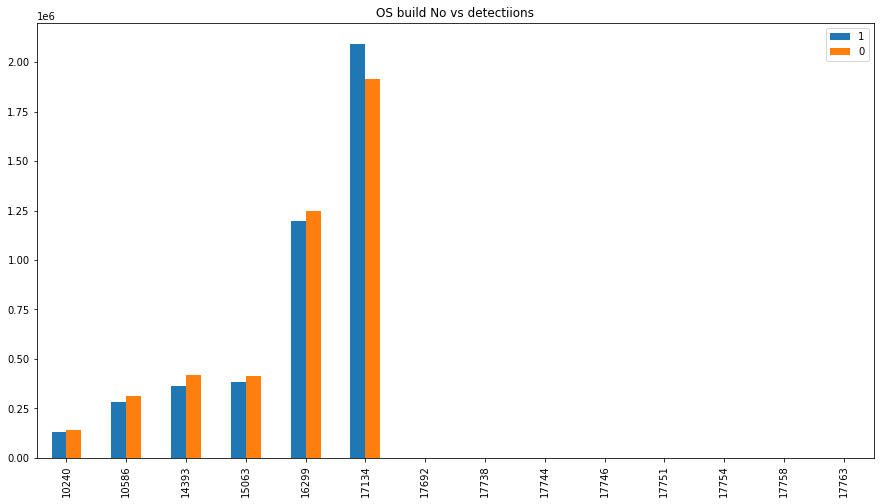

In [66]:
from collections import Counter
cols = ['Census_OSBuildNumber', 'HasDetections']
os_build_df = processed_dataframe[cols]


os_build_df_modified = os_build_df.groupby('Census_OSBuildNumber')['HasDetections'].apply(list).reset_index(name="Detection_Counts")

os_build_with_detections = {}
os_build_with_detection_percentage = {}

for index, row in os_build_df_modified.iterrows():
  if len(row['Detection_Counts']) >1000:
    count = Counter(row['Detection_Counts'])
    os_build_with_detections[row['Census_OSBuildNumber']] = count
    no_of_detections = count[1] if 1 in count else 0
    no_of_undetections_os = count[0] if 1 in count else 0
    os_build_with_detection_percentage[row['Census_OSBuildNumber']] = no_of_detections * 100/(no_of_detections + no_of_undetections_os)

pd.DataFrame(os_build_with_detections).T.plot.bar(title ="OS build No vs detectiions", figsize =(15,8))


As seen 17134 Os Build number contributed to larger part of malware been detected and is a majority amongst all the revisions.

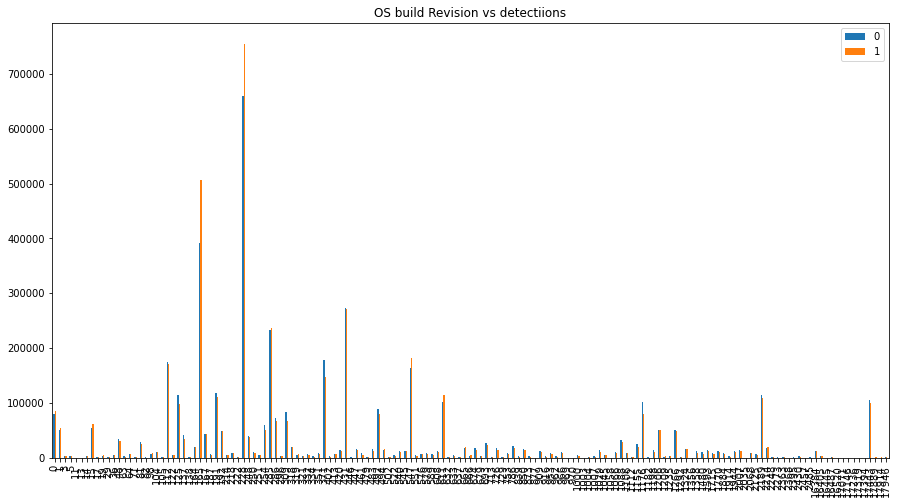

In [67]:
cols = ['Census_OSBuildRevision', 'HasDetections']
os_build_df1 = processed_dataframe[cols]


os_build_df_modified1 = os_build_df1.groupby('Census_OSBuildRevision')['HasDetections'].apply(list).reset_index(name="Detection_Counts")

os_build_with_detections1 = {}
os_build_with_detection_percentage1 = {}

for index, row in os_build_df_modified1.iterrows():
  if len(row['Detection_Counts']) >1000:
    count = Counter(row['Detection_Counts'])
    os_build_with_detections1[row['Census_OSBuildRevision']] = count
    no_of_detections = count[1] if 1 in count else 0
    no_of_undetections_os = count[0] if 1 in count else 0
    os_build_with_detection_percentage1[row['Census_OSBuildRevision']] = no_of_detections * 100/(no_of_detections + no_of_undetections_os)

pd.DataFrame(os_build_with_detections1).T.plot.bar(title ="OS build Revision vs detectiions", figsize =(15,8))


## **Section 3: Effect of Number of AV Products Installed (Q4)**

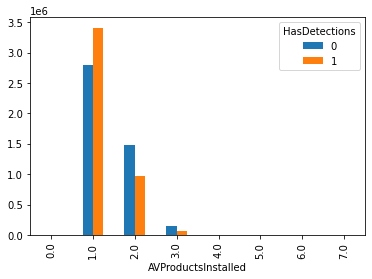

In [57]:
percent_detected_av = processed_dataframe.groupby(['AVProductsInstalled', 'HasDetections'])['HasDetections'].count().reset_index(name="detection_count")

percent_detected_av.pivot(index='AVProductsInstalled', columns='HasDetections', values='detection_count').plot.bar()


As seen as we increase the number of Antivirus in the system , the proportion of the malware been detected reduces . And as a result having multiple antivirus softwares increases your chances to detect the malwares to a larger extend.

## **Section 4: Interesting findings (Q5)**



1.   Does the Activation Channel really increases the chances of getting affected by malwares?



In [34]:
processed_dataframe.Census_ActivationChannel.value_counts() #

Retail            4727589
OEM:DM            3413350
Volume:GVLK        450954
OEM:NONSLP         317980
Volume:MAK           8028
Retail:TB:Eval       3582
Name: Census_ActivationChannel, dtype: int64

In [35]:
# Binning similar categories

processed_dataframe['Census_ActivationChannel']=np.where(processed_dataframe['Census_ActivationChannel'] =='OEM:DM', 'OEM', processed_dataframe['Census_ActivationChannel'])
processed_dataframe['Census_ActivationChannel']=np.where(processed_dataframe['Census_ActivationChannel'] =='OEM:NONSLP', 'OEM', processed_dataframe['Census_ActivationChannel'])

processed_dataframe['Census_ActivationChannel']=np.where(processed_dataframe['Census_ActivationChannel'] =='Retail:TB:Eval', 'Retail', processed_dataframe['Census_ActivationChannel'])

processed_dataframe['Census_ActivationChannel']=np.where(processed_dataframe['Census_ActivationChannel'] =='Volume:GVLK', 'Volume', processed_dataframe['Census_ActivationChannel'])
processed_dataframe['Census_ActivationChannel']=np.where(processed_dataframe['Census_ActivationChannel'] =='Volume:MAK', 'Volume', processed_dataframe['Census_ActivationChannel'])


In [36]:
processed_dataframe.Census_ActivationChannel.value_counts() #

Retail    4731171
OEM       3731330
Volume     458982
Name: Census_ActivationChannel, dtype: int64

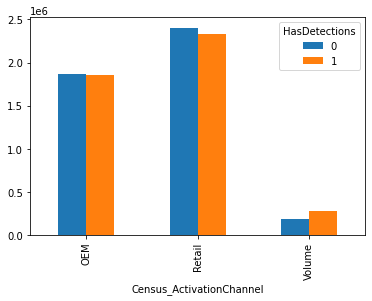

In [37]:
percent_detected_activation = processed_dataframe.groupby(['Census_ActivationChannel', 'HasDetections'])['HasDetections'].count().reset_index(name="detection_count")

percent_detected_activation.pivot(index='Census_ActivationChannel', columns='HasDetections', values='detection_count').plot.bar()

As per the above bar graph, the malware found is more in proportion with not found when Volume Activation is done. Retail and OEM has equal proportion of malware detections



2.   What type of device has more number of malware detections?



In [38]:
processed_dataframe.Census_MDC2FormFactor.value_counts() #

Notebook        5723319
Desktop         1951086
Convertible      405378
Detachable       298233
AllInOne         292077
PCOther          139955
LargeTablet       67121
SmallTablet       31393
SmallServer        8630
MediumServer       3385
LargeServer         875
ServerOther          30
IoTOther              1
Name: Census_MDC2FormFactor, dtype: int64

In [39]:
#Notebook groups.
processed_dataframe['Census_MDC2FormFactor']=np.where(processed_dataframe['Census_MDC2FormFactor'] =='Convertible', 'Notebook', processed_dataframe['Census_MDC2FormFactor'])
processed_dataframe['Census_MDC2FormFactor']=np.where(processed_dataframe['Census_MDC2FormFactor'] =='Detachable', 'Notebook', processed_dataframe['Census_MDC2FormFactor'])

#tablet groups
processed_dataframe['Census_MDC2FormFactor']=np.where(processed_dataframe['Census_MDC2FormFactor'] =='LargeTablet', 'Tablet', processed_dataframe['Census_MDC2FormFactor'])
processed_dataframe['Census_MDC2FormFactor']=np.where(processed_dataframe['Census_MDC2FormFactor'] =='SmallTablet', 'Tablet', processed_dataframe['Census_MDC2FormFactor'])

# Server groups
processed_dataframe['Census_MDC2FormFactor']=np.where(processed_dataframe['Census_MDC2FormFactor'] =='SmallServer', 'Server', processed_dataframe['Census_MDC2FormFactor'])
processed_dataframe['Census_MDC2FormFactor']=np.where(processed_dataframe['Census_MDC2FormFactor'] =='LargeServer', 'Server', processed_dataframe['Census_MDC2FormFactor'])
processed_dataframe['Census_MDC2FormFactor']=np.where(processed_dataframe['Census_MDC2FormFactor'] =='MediumServer', 'Server', processed_dataframe['Census_MDC2FormFactor'])
processed_dataframe['Census_MDC2FormFactor']=np.where(processed_dataframe['Census_MDC2FormFactor'] =='ServerOther', 'Server', processed_dataframe['Census_MDC2FormFactor'])
processed_dataframe['Census_MDC2FormFactor']=np.where(processed_dataframe['Census_MDC2FormFactor'] =='IoTOther', 'Server', processed_dataframe['Census_MDC2FormFactor'])

# Desktop Groups
processed_dataframe['Census_MDC2FormFactor']=np.where(processed_dataframe['Census_MDC2FormFactor'] =='AllInOne', 'Desktop', processed_dataframe['Census_MDC2FormFactor'])
processed_dataframe['Census_MDC2FormFactor']=np.where(processed_dataframe['Census_MDC2FormFactor'] =='PCOther', 'Desktop', processed_dataframe['Census_MDC2FormFactor'])



In [42]:
processed_dataframe.Census_MDC2FormFactor.value_counts() 

Notebook    6426930
Desktop     2383118
Tablet        98514
Server        12921
Name: Census_MDC2FormFactor, dtype: int64

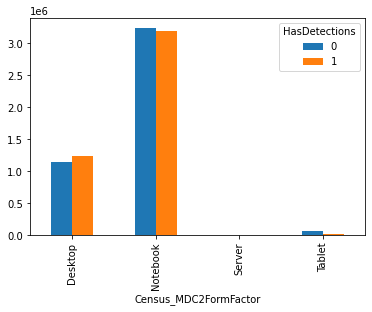

In [43]:
percent_detected_mdc2_factor = processed_dataframe.groupby(['Census_MDC2FormFactor', 'HasDetections'])['HasDetections'].count().reset_index(name="detection_count")

percent_detected_mdc2_factor.pivot(index='Census_MDC2FormFactor', columns='HasDetections', values='detection_count').plot.bar()

Notebooks and Desktops comprises of majority in the given data and also has proportionately higher number of malwares been reported over the range of devices.



3.   Does having touch instead of traditional keyboards reduce the risk of malwares as keyboard based machines are more susceptible to keylogger malwares which are in abundance?



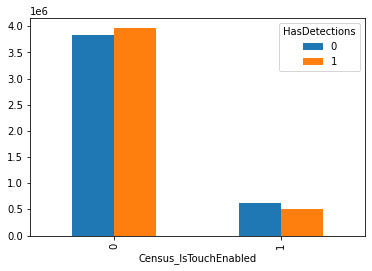

In [56]:
percent_detected_touch = processed_dataframe.groupby(['Census_IsTouchEnabled', 'HasDetections'])['HasDetections'].count().reset_index(name="detection_count")

percent_detected_touch.pivot(index='Census_IsTouchEnabled', columns='HasDetections', values='detection_count').plot.bar()

As seen in the graph, the proportion of the data reported between touch based devices and traditional keyboard based devices is skewed towards the later.
Though we can see the malwares detected in the touch based devices by malware not detected is much less than the traditional devices , thus holding the above statement true.

## **Section 5: Baseline modelling (Q6)**

In [30]:
print(orig_df[['Census_ActivationChannel', 'Census_TotalPhysicalRAM' ,'Census_ProcessorCoreCount', 'Census_OSBuildNumber', 'Census_OSVersion', 'Census_IsTouchEnabled', 'AVProductsInstalled', 'Census_GenuineStateName', 'Census_IsSecureBootEnabled','AVProductStatesIdentifier']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 10 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   Census_ActivationChannel    category
 1   Census_TotalPhysicalRAM     float32 
 2   Census_ProcessorCoreCount   float64 
 3   Census_OSBuildNumber        int16   
 4   Census_OSVersion            category
 5   Census_IsTouchEnabled       int8    
 6   AVProductsInstalled         float64 
 7   Census_GenuineStateName     category
 8   Census_IsSecureBootEnabled  int8    
 9   AVProductStatesIdentifier   float32 
dtypes: category(3), float32(2), float64(2), int16(1), int8(2)
memory usage: 272.3 MB
None


In [60]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

orig_df.dropna(subset=['Census_OSBuildNumber','AVProductsInstalled'], how='any', inplace=True)

X, Y = orig_df[['Census_OSBuildNumber','AVProductsInstalled']], orig_df['HasDetections']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

baseline_model = LogisticRegression(solver='lbfgs')
baseline_model.fit(X_train, Y_train)

preds = baseline_model.predict(X_test)

print(metrics.classification_report(Y_test, preds))



              precision    recall  f1-score   support

           0       0.59      0.44      0.50    887786
           1       0.55      0.70      0.62    889267

    accuracy                           0.57   1777053
   macro avg       0.57      0.57      0.56   1777053
weighted avg       0.57      0.57      0.56   1777053



In [62]:
error_rate = 1 - baseline_model.score(X_test, Y_test)
print("Error Rate:" + str(error_rate))

Error Rate:0.43217337918452625


In [13]:
# Loading test set

test_cols = ['MachineIdentifier', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'Firewall', 'Census_ProcessorCoreCount',
       'Census_PrimaryDiskTotalCapacity', 'Census_TotalPhysicalRAM',
       'Census_OSBuildNumber', 'Census_OSBuildRevision',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Wdft_IsGamer',
       'Wdft_RegionIdentifier','Census_PrimaryDiskTypeName', 'Census_OSArchitecture']

test_dataframe = pd.read_csv("drive/MyDrive/DSF/HW2/test.csv", sep= ',', dtype = dtypes, usecols = test_cols)


In [40]:
# Preprocessing test data .i.e filling nan values so that model can be fit on the dataset

machine_identifier = test_dataframe['MachineIdentifier']

test_dataframe_for_baseline = test_dataframe[['Census_OSBuildNumber','AVProductsInstalled']]

test_dataframe_for_baseline.fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [41]:
# Fitting the test data around the model

baseline_model_preds = baseline_model.predict_proba(test_dataframe_for_baseline)[:,1]
baseline_model_preds_df = pd.DataFrame(baseline_model_preds, columns=['HasDetections'])
baseline_model_preds_df.head()

,HasDetections
0,0.535181
1,0.550062
2,0.387677
3,0.409843
4,0.550062


In [42]:
# Outputting the results of probablity of detection

import pandas
import csv

header = ["MachineIdentifier", "HasDetections"]
baseline_clf_preds_df['MachineIdentifier'] = machine_identifier
baseline_clf_preds_df.to_csv('/content/drive/MyDrive/DSF/HW2/test_predictions_base_log.csv', columns = header, index=False)

ROC/AUC score :0.5677191384808297


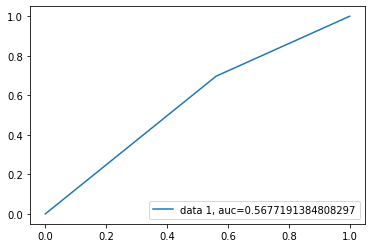

In [47]:
# Calculating ROC/SOC score and plotting it on graph

import matplotlib.pyplot as plt

auc = metrics.roc_auc_score(Y_test, preds)
print("ROC/AUC score :" + str(auc))
fpr, tpr, _ = metrics.roc_curve(Y_test,  preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



## **Section 6: Feature Cleaning and Additional models (Q7a & 7b)**

In [4]:
import pandas as pd
import numpy as np

use_cols_different = ["AVProductStatesIdentifier", "AVProductsInstalled", "AVProductsEnabled", "Firewall" , "HasTpm", "CountryIdentifier", 
                      "Wdft_RegionIdentifier", "Wdft_IsGamer", "Census_IsVirtualDevice", "Census_OSArchitecture",  "Census_IsTouchEnabled",
                      "Census_OSBuildNumber",'Census_OSBuildRevision', "HasDetections" , "Census_ProcessorCoreCount" ,
                      "Census_TotalPhysicalRAM", "Census_PrimaryDiskTypeName", "Census_PrimaryDiskTotalCapacity", "HasDetections"]
                      
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16'        
  }
  
selected_features_df = pd.read_csv("drive/MyDrive/DSF/HW2/train.csv", sep= ',', dtype = dtypes, usecols = use_cols_different)

In [5]:
# Analysing Null Values in all columns, in training data

null_percentage = (selected_features_df.isnull().sum() / selected_features_df.shape[0])/100

print(type(null_percentage))

new_df= pd.DataFrame(data=null_percentage,columns=['%nullvalues'])

new_df = new_df.sort_values(by='%nullvalues',ascending=False)

print(new_df)


<class 'pandas.core.series.Series'>
                                 %nullvalues
Wdft_RegionIdentifier               0.000340
Wdft_IsGamer                        0.000340
Firewall                            0.000102
Census_TotalPhysicalRAM             0.000090
Census_PrimaryDiskTotalCapacity     0.000059
Census_ProcessorCoreCount           0.000046
AVProductsInstalled                 0.000041
AVProductStatesIdentifier           0.000041
AVProductsEnabled                   0.000041
Census_IsVirtualDevice              0.000018
Census_PrimaryDiskTypeName          0.000014
CountryIdentifier                   0.000000
Census_OSArchitecture               0.000000
Census_OSBuildNumber                0.000000
Census_OSBuildRevision              0.000000
Census_IsTouchEnabled               0.000000
HasTpm                              0.000000
HasDetections                       0.000000


HEATMAP:


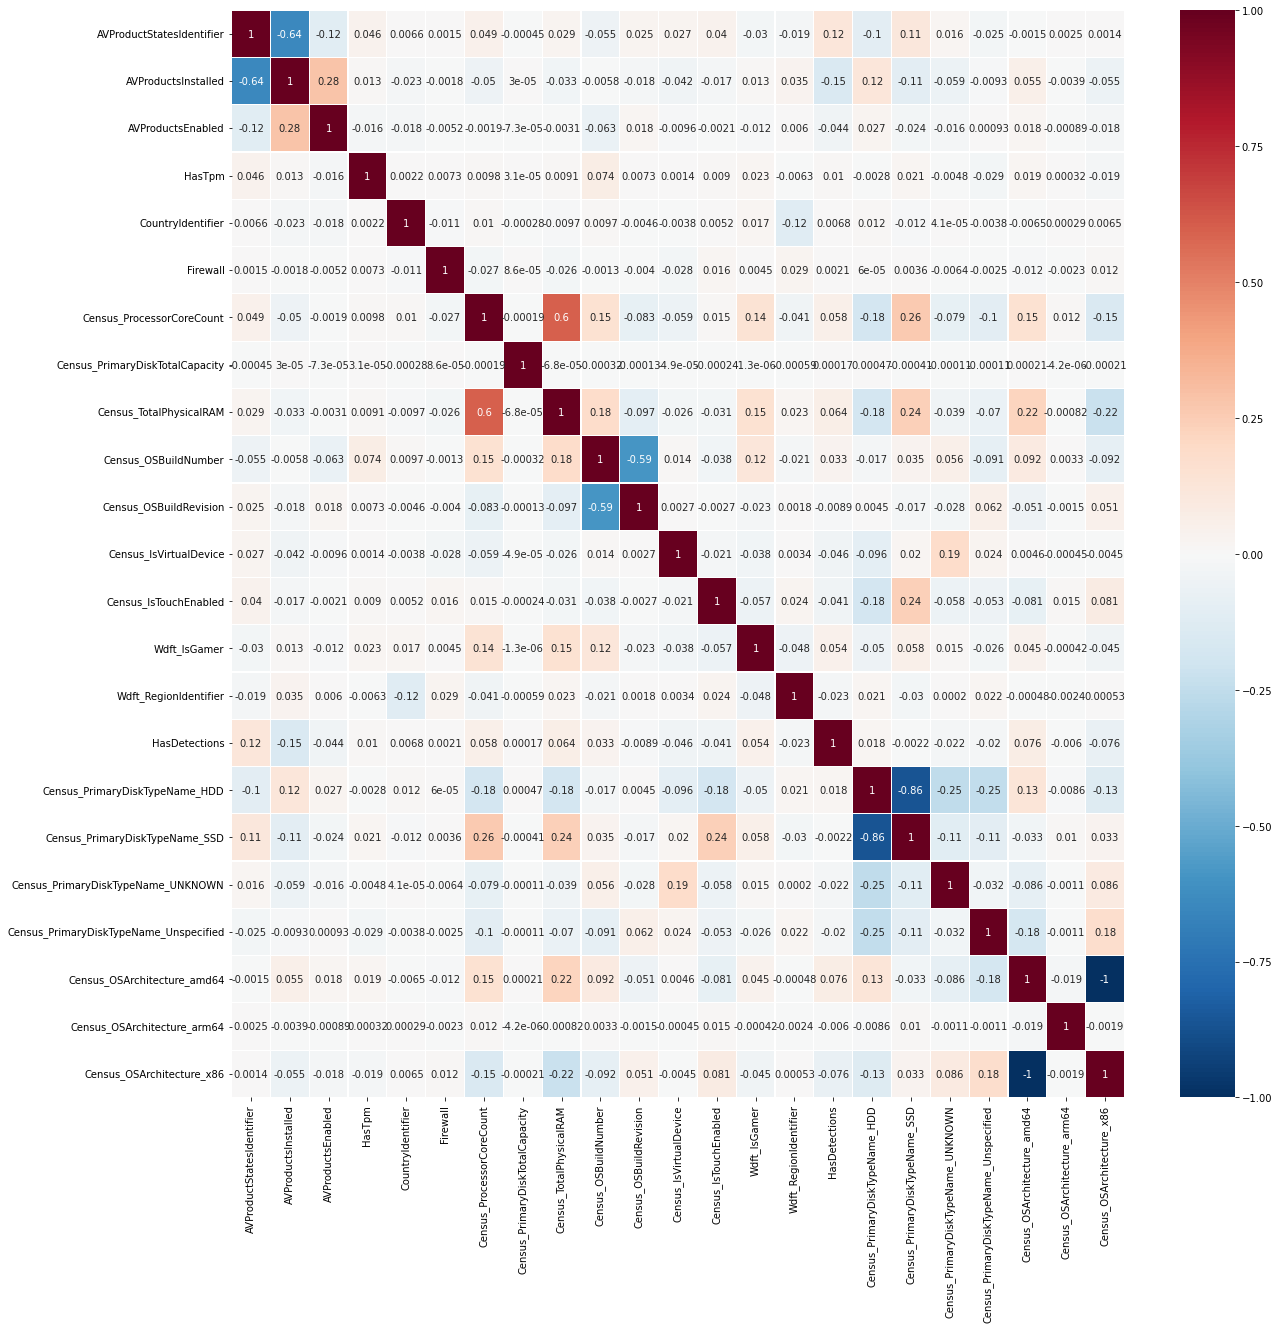

In [39]:
# Plotting Correlation matrix and trying to come up with limited features to be provided to the model

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = selected_features_df.corr()
print("HEATMAP:")
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,vmin=-1, vmax=1, cmap='RdBu_r', linewidths=0.2, annot=True)
plt.show()

In [ ]:
# Feature reduction using RFE method

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 10)
X, Y = selected_features_df[['AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'Firewall', 'Census_ProcessorCoreCount',
       'Census_PrimaryDiskTotalCapacity', 'Census_TotalPhysicalRAM',
       'Census_OSBuildNumber', 'Census_OSBuildRevision',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Wdft_IsGamer',
       'Wdft_RegionIdentifier',
       'Census_PrimaryDiskTypeName_HDD', 'Census_PrimaryDiskTypeName_SSD',
       'Census_PrimaryDiskTypeName_UNKNOWN',
       'Census_PrimaryDiskTypeName_Unspecified', 'Census_OSArchitecture_amd64',
       'Census_OSArchitecture_arm64', 'Census_OSArchitecture_x86']], selected_features_df['HasDetections']
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

In [6]:
# Dropping Null Values as they are insignificant

selected_features_df.dropna(how='any', inplace=True)

print(selected_features_df.shape)


(8405578, 18)


In [8]:
# One Hot Encoding the Categorical values of training data

selected_features_df = pd.get_dummies(selected_features_df, columns = ['Census_PrimaryDiskTypeName', 'Census_OSArchitecture'])


In [9]:
# Standardizing the data in the set using Standard Scaler to
# fit the data in the range 0 to 1 and assign equal weights

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
cols = ['AVProductStatesIdentifier', 'AVProductsInstalled', 'CountryIdentifier', 'Census_ProcessorCoreCount',
'Census_PrimaryDiskTotalCapacity', 'Census_TotalPhysicalRAM',
'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Wdft_IsGamer', 'Wdft_RegionIdentifier']

scaler = standard_scaler.fit(selected_features_df[cols].values)
selected_features_df[cols] = scaler.transform(selected_features_df[cols].values)

In [10]:
# Splitting data into training and testing sets 

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

X, Y = selected_features_df[['AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'Firewall', 'Census_ProcessorCoreCount',
       'Census_PrimaryDiskTotalCapacity', 'Census_TotalPhysicalRAM',
       'Census_OSBuildNumber', 'Census_OSBuildRevision',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Wdft_IsGamer',
       'Wdft_RegionIdentifier',
       'Census_PrimaryDiskTypeName_HDD', 'Census_PrimaryDiskTypeName_SSD',
       'Census_PrimaryDiskTypeName_UNKNOWN',
       'Census_PrimaryDiskTypeName_Unspecified', 'Census_OSArchitecture_amd64',
       'Census_OSArchitecture_arm64', 'Census_OSArchitecture_x86']], selected_features_df['HasDetections']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Y_test.head()
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(6724462, 22) (1681116, 22) (6724462,) (1681116,)


In [11]:
# Running based on Logistic regression
from sklearn.linear_model import LogisticRegression 

logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_regression.fit(X_train, Y_train)

preds = logistic_regression.predict(X_test)

print(metrics.classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.61      0.51      0.55    840470
           1       0.58      0.67      0.62    840646

    accuracy                           0.59   1681116
   macro avg       0.59      0.59      0.59   1681116
weighted avg       0.59      0.59      0.59   1681116



In [25]:
# Generating model based on Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
random_forest.fit(X_train, Y_train)
preds = random_forest.predict(X_test)
print(metrics.classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57    840470
           1       0.59      0.68      0.63    840646

    accuracy                           0.60   1681116
   macro avg       0.61      0.60      0.60   1681116
weighted avg       0.61      0.60      0.60   1681116



In [ ]:
# loading test data for testing. No need for this step as the data is already loaded by baseline model

# test_cols = ['MachineIdentifier', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
#        'HasTpm', 'CountryIdentifier', 'Firewall', 'Census_ProcessorCoreCount',
#        'Census_PrimaryDiskTotalCapacity', 'Census_TotalPhysicalRAM',
#        'Census_OSBuildNumber', 'Census_OSBuildRevision',
#        'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Wdft_IsGamer',
#        'Wdft_RegionIdentifier','Census_PrimaryDiskTypeName', 'Census_OSArchitecture']

# test_dataframe = pd.read_csv("drive/MyDrive/DSF/HW2/test.csv", sep= ',', dtype = dtypes, usecols = test_cols)


In [17]:
# One Hot Encoding the Categorical values for testing data

test_dataframe = pd.get_dummies(test_dataframe, columns = ['Census_PrimaryDiskTypeName', 'Census_OSArchitecture'])


In [19]:
#Preprocessing the test data 
machine_identifier = test_dataframe['MachineIdentifier']

test_dataframe.drop(['MachineIdentifier'], axis=1, inplace=True)

test_dataframe.fillna(value = 0,inplace = True)

In [20]:
# Standardizing using standard scaler

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
cols = ['AVProductStatesIdentifier', 'AVProductsInstalled', 'CountryIdentifier', 'Census_ProcessorCoreCount',
'Census_PrimaryDiskTotalCapacity', 'Census_TotalPhysicalRAM', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Wdft_IsGamer', 'Wdft_RegionIdentifier']

scaler = standard_scaler.fit(test_dataframe[cols].values)
test_dataframe[cols] = scaler.transform(test_dataframe[cols].values)

In [22]:
#Fitting Logistic Regression model

probability_prediction_logistic = logistic_regression.predict_proba(test_dataframe)[:,1]
probability_prediction_logistic_df = pd.DataFrame(probability_prediction_logistic, columns=['HasDetections'])
probability_prediction_logistic_df.head()

,HasDetections
0,0.528596
1,0.606935
2,0.404091
3,0.385706
4,0.603870


In [23]:
# Exporting the logistic regression model output 

import pandas
import csv

header = ["MachineIdentifier", "HasDetections"]
probability_prediction_logistic_df['MachineIdentifier'] = machine_identifier
probability_prediction_logistic_df.to_csv('/content/drive/MyDrive/DSF/HW2/test_predictions_logistic.csv', columns = header, index=False)

In [27]:
# Fitting Random Forest model

probability_prediction_random_forest = random_forest.predict_proba(test_dataframe)[:,1]
probability_prediction_random_forest_df = pd.DataFrame(probability_prediction_random_forest, columns=['HasDetections'])
probability_prediction_random_forest_df.head()



,HasDetections
0,0.551661
1,0.597836
2,0.471762
3,0.339832
4,0.541178


In [28]:
# Exporting the random forest model output 
import pandas
import csv

header = ["MachineIdentifier", "HasDetections"]
probability_prediction_random_forest_df['MachineIdentifier'] = machine_identifier
probability_prediction_random_forest_df.to_csv('/content/drive/MyDrive/DSF/HW2/test_predictions_random_forest.csv', columns = header, index=False)

## **Section 7: Screenshots (Q8)** 

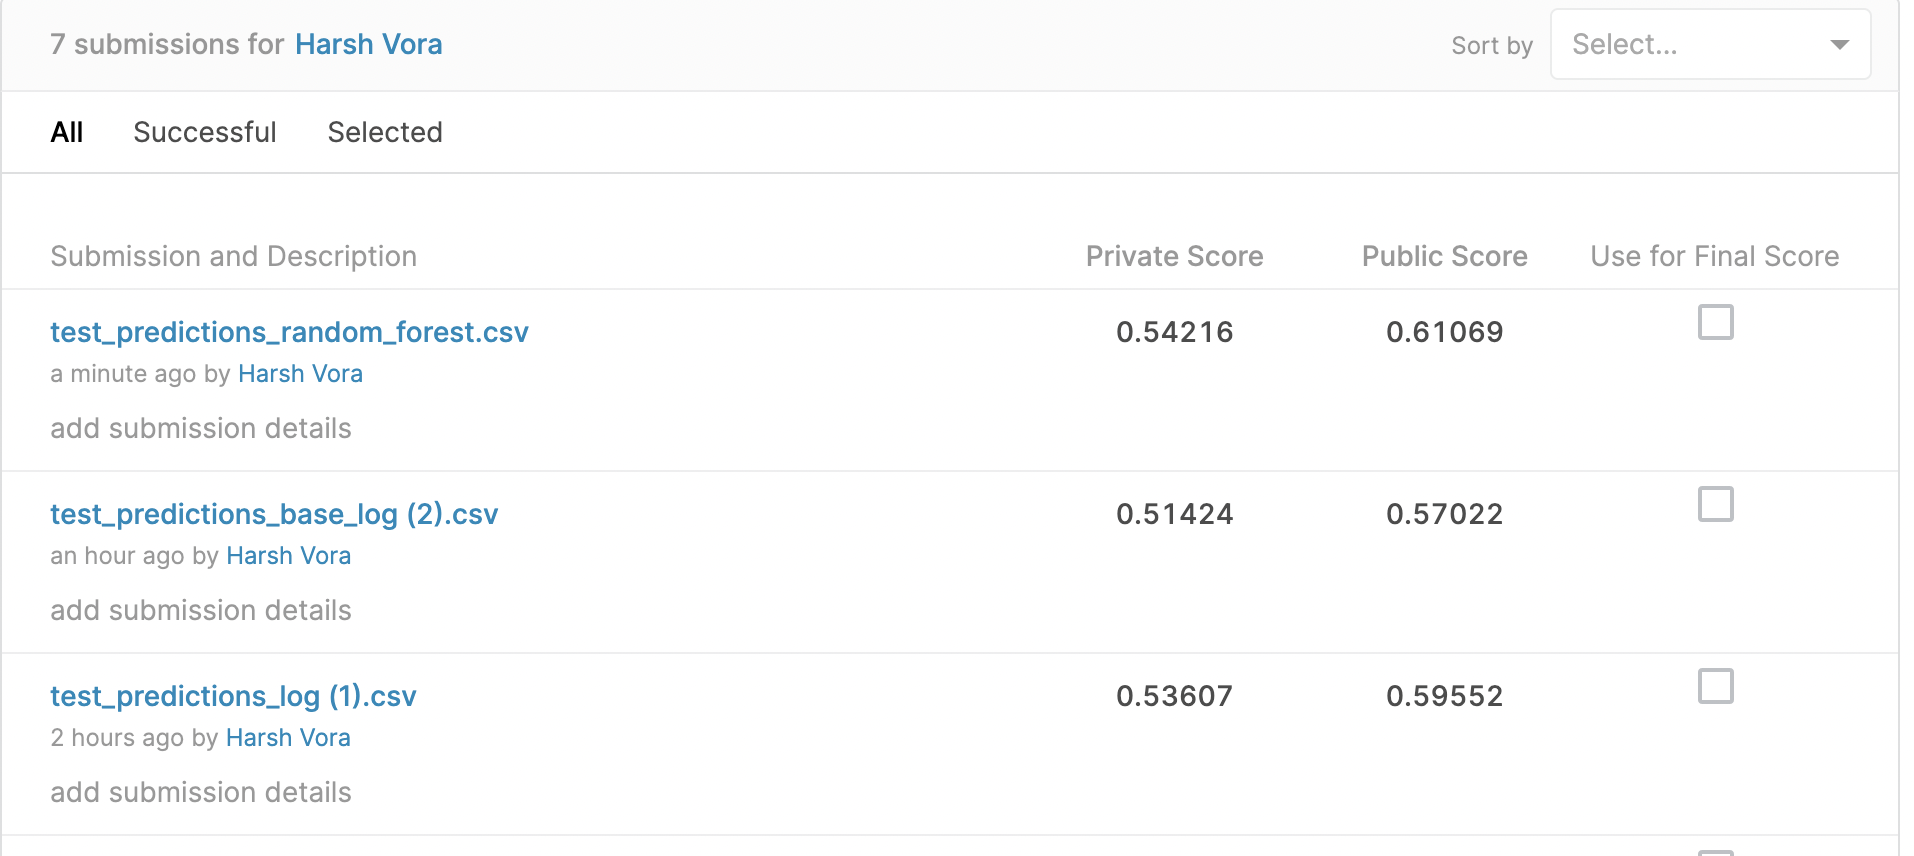

Public Score: 0.61069

Private Score: 0.54216

Kaggle profile link: https://www.kaggle.com/harvora

Screenshot(s): See above